In [18]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

# Part1

In [27]:
P0 = 100
P1 = 110
leverage = 7
margin = P0/2 #실제 지불한 금액

In [28]:
margin

50.0

In [29]:
unlev_return = (P1 - P0) / P0 #비마진거래 시 단순 수익률 
unlev_return

0.1

In [30]:
lev_return = (P1 - P0) / margin #마진 거래시 수익률
lev_return

0.2

In [31]:
lev_return == unlev_return * leverage

False

In [32]:
unlev_return = np.log((P1 - P0) / P0 + 1) #로그 수익률
unlev_return

0.09531017980432493

In [33]:
lev_return = np.log((P1 - P0) / margin + 1) #로그 수익률
lev_return

0.1823215567939546

In [34]:
lev_return == unlev_return * leverage 

False

# Part 2 

In [35]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2024-02-12,415.2600,-0.0126
2024-02-13,406.3200,-0.0215
2024-02-14,409.4900,0.0078


In [36]:
msft["Simple_Ret"] = msft.Price.pct_change()

In [40]:
leverage = 7

In [41]:
msft["Lev_Returns"] = msft.Simple_Ret.mul(leverage)
msft

,Price,Returns,Simple_Ret,Lev_Returns
Date,,,,
2014-10-01,45.9000,NaN,NaN,NaN
2014-10-02,45.7600,-0.0031,-0.0031,-0.0214
2014-10-03,46.0900,0.0072,0.0072,0.0505
2014-10-06,46.0900,0.0000,0.0000,0.0000
2014-10-07,45.5300,-0.0122,-0.0122,-0.0851
...,...,...,...,...
2024-02-12,415.2600,-0.0126,-0.0126,-0.0881
2024-02-13,406.3200,-0.0215,-0.0215,-0.1507
2024-02-14,409.4900,0.0078,0.0078,0.0546


In [50]:
msft["Lev_Returns"] = np.where(msft["Lev_Returns"] < -1, -1, msft["Lev_Returns"])
msft

,Price,Returns,Simple_Ret,Lev_Returns
Date,,,,
2014-10-01,45.9000,NaN,NaN,NaN
2014-10-02,45.7600,-0.0031,-0.0031,-0.0214
2014-10-03,46.0900,0.0072,0.0072,0.0505
2014-10-06,46.0900,0.0000,0.0000,0.0000
2014-10-07,45.5300,-0.0122,-0.0122,-0.0851
...,...,...,...,...
2024-02-12,415.2600,-0.0126,-0.0126,-0.0881
2024-02-13,406.3200,-0.0215,-0.0215,-0.1507
2024-02-14,409.4900,0.0078,0.0078,0.0546


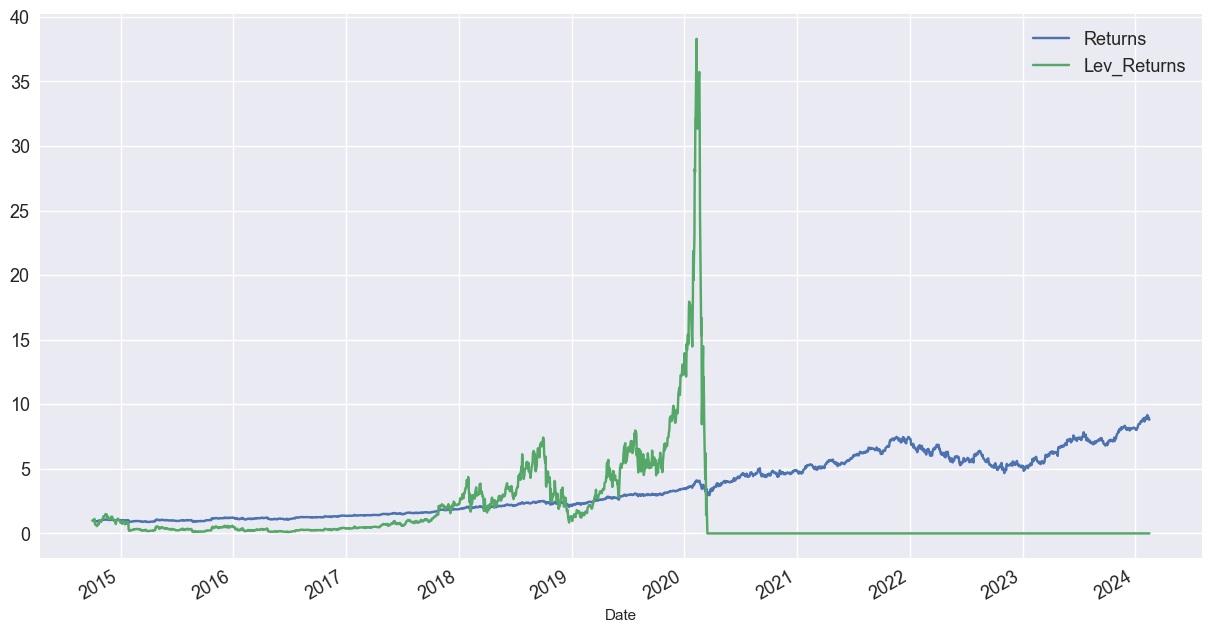

In [47]:
msft[["Returns", "Lev_Returns"]].add(1).cumprod().plot(figsize = (15,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [51]:
-1 / msft.Simple_Ret.min()
#7이상의 레버리지로 마진콜 발생->증거금을 더 넣어야하며 더 안넣을 시 강제 청산(마진 클로즈)

6.784706406865346